## Fitting drug response curves with sigmoid function

In [1]:
import pandas as pd
import numpy as np


from tqdm import tqdm
import warnings
from fitting import *

warnings.filterwarnings("ignore")
_FOLDER = "data/"
_FOLDER_2 = "figures/"

## Fitting data

In [3]:
df = pd.read_csv("results/filt_123.csv")
conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]
df.columns

Index(['CELL_LINE_NAME', 'COSMIC_ID', 'DRUG_ID', 'DRUGID_COSMICID',
       'FOLD_DILUTION', 'MAX_CONC', 'fd_num_0', 'fd_num_1', 'fd_num_2',
       'fd_num_3', 'fd_num_4', 'fd_num_5', 'fd_num_6', 'fd_num_7', 'fd_num_8',
       'fd_num_9', 'norm_cells_0', 'norm_cells_1', 'norm_cells_2',
       'norm_cells_3', 'norm_cells_4', 'norm_cells_5', 'norm_cells_6',
       'norm_cells_7', 'norm_cells_8', 'norm_cells_9', 'drug_name', 'CCL_name',
       'dif_first', 'dif_last'],
      dtype='object')

### sigmoid_4_param

In [4]:
%%time
fitting_function = "sigmoid_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]>0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
print("Number of samples with fitting <0.1:", df[df[fitting_function+"_r2"]<0.1].shape[0])
print("")

100%|██████████| 2776/2776 [00:10<00:00, 272.28it/s]

<function sigmoid_4_param at 0x7fb3b92ce730>
R2>0: (2755, 32)
R2>0.9 2703
Number of samples with fitting <0.1: 21

CPU times: user 9.51 s, sys: 757 ms, total: 10.3 s
Wall time: 10.2 s


## Visual Analysis of fitting efficiency

### All samples

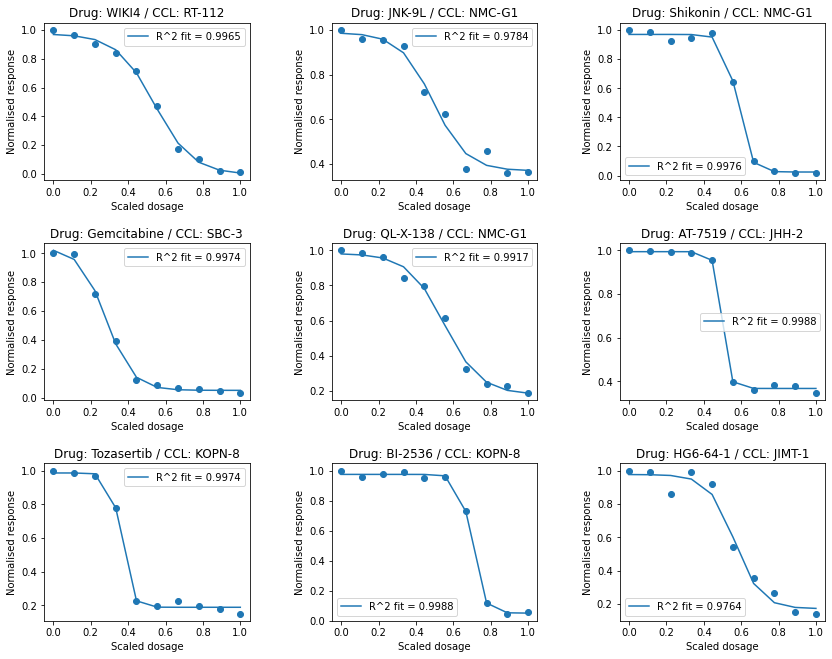

In [5]:
# ShowResponseCurvesWithFitting(df.drop(["drug_name", "CCL_name"],axis=1), plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
#                         indexes=df.index[:9],fitting_function = fitting_function, 
#                                   fitting_parameters =fitting_function)

ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### Bad fitting examples (examination after analysis of predictive models)

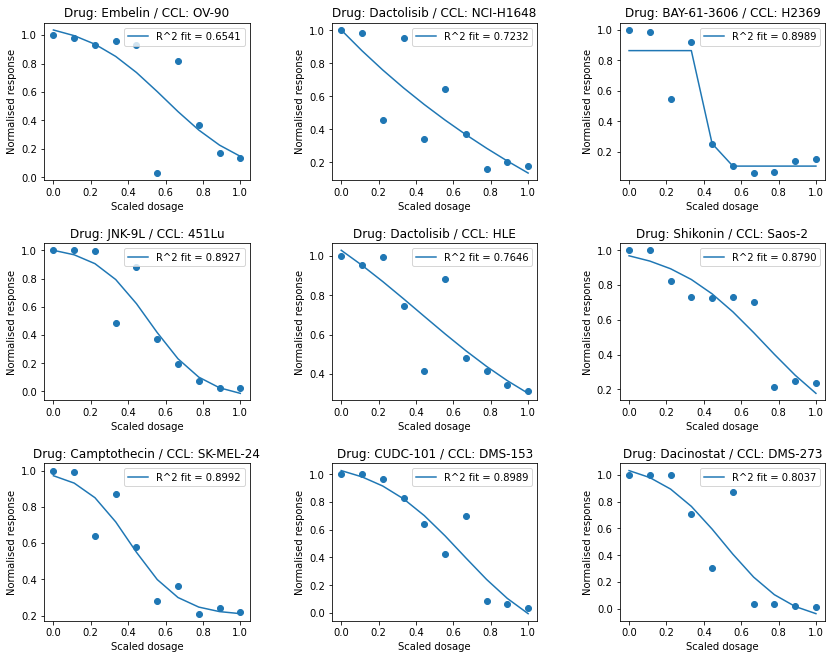

In [6]:
df2= df[(df[fitting_function+"_r2"]>0.1)& (df[fitting_function+"_r2"]<0.9)]

ShowResponseCurvesWithFitting(df2, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes= df2.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### Outliers in predictive models

Fitting parameters: [  9.5724958   -9.65402097 -11.75490706   0.34259313]
Predicted parameters: [0.348604, 1.106316, -14.202945, 0.168828]


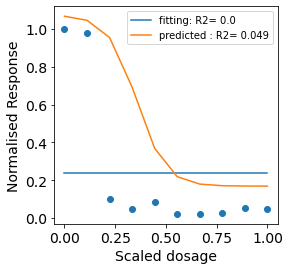

In [7]:
ind = int(df[(df["DRUG_ID"]==180)& (df["COSMIC_ID"]==907064)].index[0])
fitting_parameters = fitting_function
predicted_param = [0.348604, 1.106316, -14.202945, 0.168828]
save_fig_name = _FOLDER_2+"outlier_coef1_1.png"

ShowOneFitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, predicted_param)

Fitting parameters: [ 1.2373539   0.48181959 -1.88612485 -0.75696168]
Predicted parameters: [0.623563, 1.099364, -13.124646, -8.77264e-15]


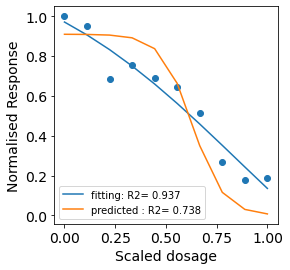

In [8]:
ind =int(df[(df["DRUG_ID"]==173)& (df["COSMIC_ID"]==687777)].index[0])
fitting_parameters =fitting_function
predicted_param = [0.623563, 1.099364, -13.124646, -8.772640e-15]
save_fig_name = _FOLDER_2+"outlier_coef3.png"

ShowOneFitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, predicted_param)

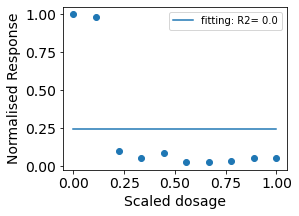

In [9]:
ind =int(df[(df["DRUG_ID"]==180)& (df["COSMIC_ID"]==907064)].index[0])
fitting_parameters =fitting_function
save_fig_name = _FOLDER_2+"outlier_coef1_2.png"

fig_size = (4,3)
ShowOneFitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, fig_size=fig_size)

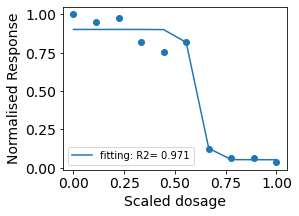

In [10]:
ind =int(df[(df["DRUG_ID"]==273)& (df["COSMIC_ID"]==907071)].index[0])
fitting_parameters =fitting_function
save_fig_name = _FOLDER_2+"filt_fit_0.png"

fig_size = (4,3)
ShowOneFitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, fig_size=fig_size)

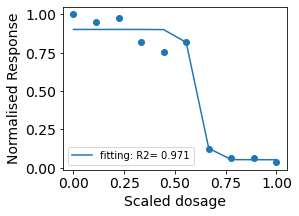

In [11]:
ind =int(df[(df["DRUG_ID"]==273)& (df["COSMIC_ID"]==907071)].index[0])
fitting_parameters = fitting_function
save_fig_name = _FOLDER_2+"filt_fit_0.png"

fig_size = (4,3)
ShowOneFitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, fig_size=fig_size)

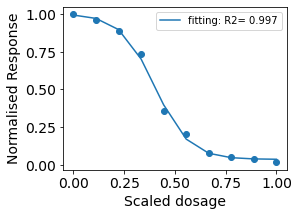

In [12]:
ind =int(df[(df["DRUG_ID"]==274)& (df["COSMIC_ID"]==1240223)].index[0])
save_fig_name = _FOLDER_2+"filt_fit_1.png"

fig_size = (4,3)
ShowOneFitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, fig_size=fig_size)


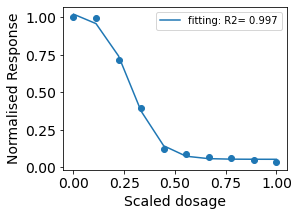

In [13]:
ind =int(df[(df["DRUG_ID"]==135)& (df["COSMIC_ID"]==753610)].index[0])
save_fig_name = _FOLDER_2+"filt_fit_2.png"

fig_size = (4,3)
ShowOneFitting(df, ind, conc_columns, response_norm, fitting_function, fitting_parameters, fig_size=fig_size)

### sigmoid_2_param

100%|██████████| 2724/2724 [00:01<00:00, 1389.79it/s]


R2>0: (2724, 34)
R2>0.9 2440
CPU times: user 2.18 s, sys: 8.96 ms, total: 2.19 s
Wall time: 2.17 s


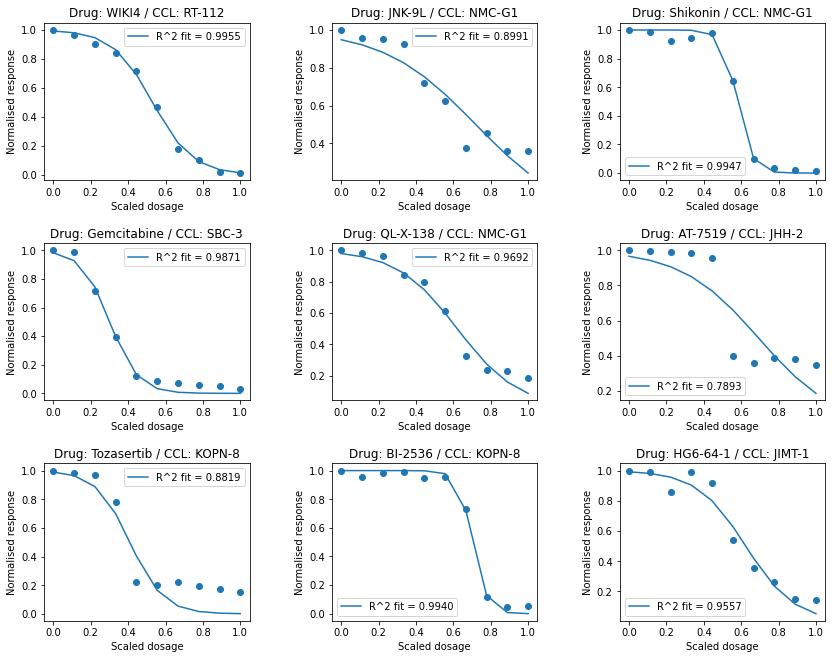

In [14]:
%%time
fitting_function = "sigmoid_2_param" 
# "sigmoid_Wang" we don't need default_param_number
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### sigmoid_3_param

100%|██████████| 2724/2724 [00:02<00:00, 933.58it/s] 


R2>0: (2724, 36)
R2>0.9 2665
CPU times: user 3.06 s, sys: 24.4 ms, total: 3.09 s
Wall time: 3.06 s


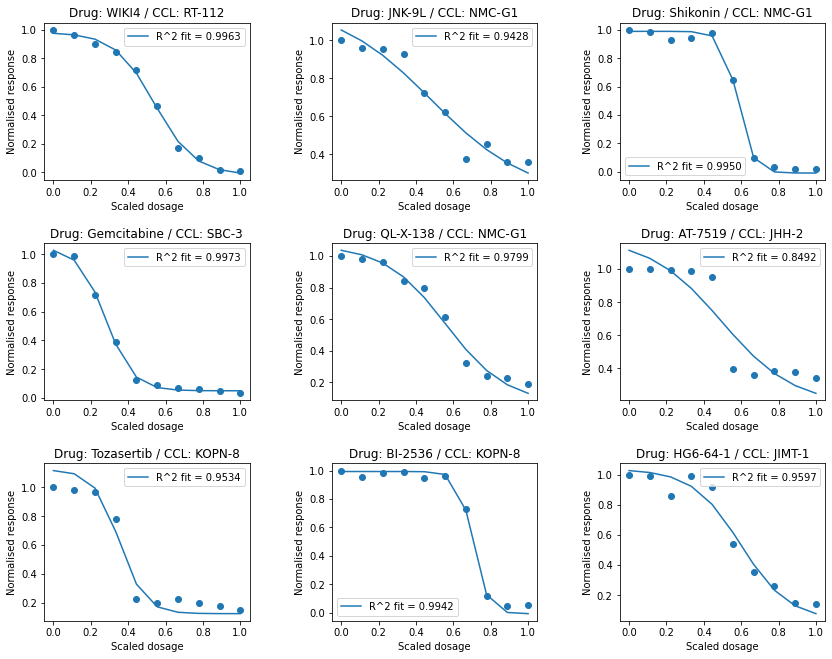

In [15]:
%%time
fitting_function = "sigmoid_3_param"

r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### fsigmoid

100%|██████████| 2724/2724 [00:01<00:00, 1385.94it/s]


(2724, 38)


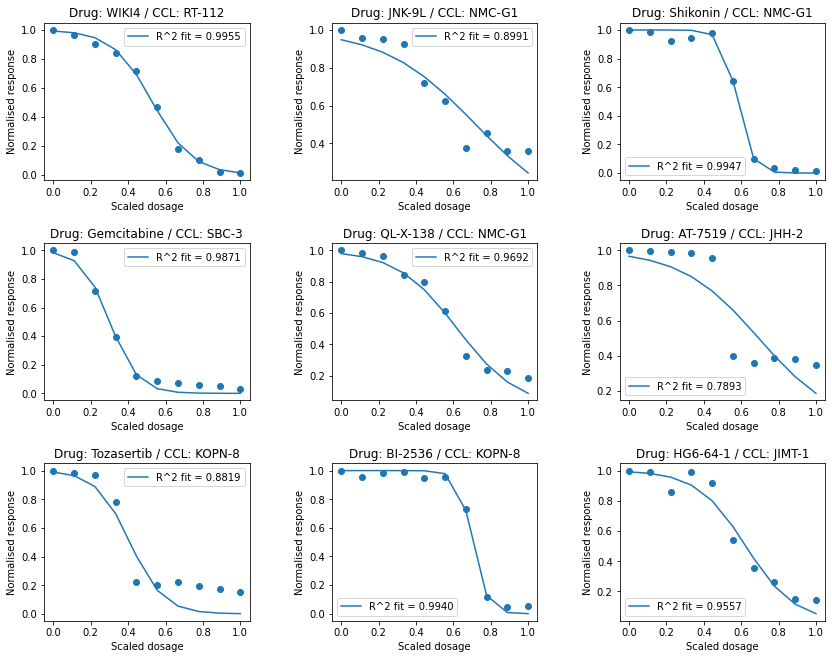

In [16]:
# %%time
fitting_function = "fsigmoid"

r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print(df.shape)

ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logistic_4_param

100%|██████████| 2724/2724 [00:03<00:00, 782.69it/s]


R2>0: (2724, 40)
R2>0.9 2701
CPU times: user 3.64 s, sys: 9.06 ms, total: 3.65 s
Wall time: 3.62 s


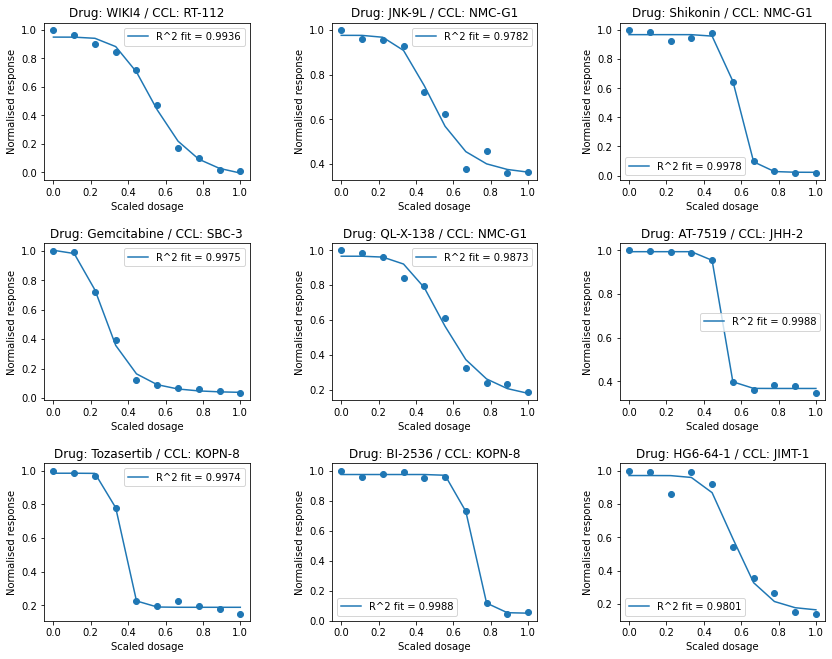

In [17]:
%%time
fitting_function = "logistic_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### LL4_4_param

100%|██████████| 2724/2724 [00:04<00:00, 637.59it/s]


R2>0: (2724, 42)
R2>0.9 2701
CPU times: user 4.43 s, sys: 16.6 ms, total: 4.44 s
Wall time: 4.41 s


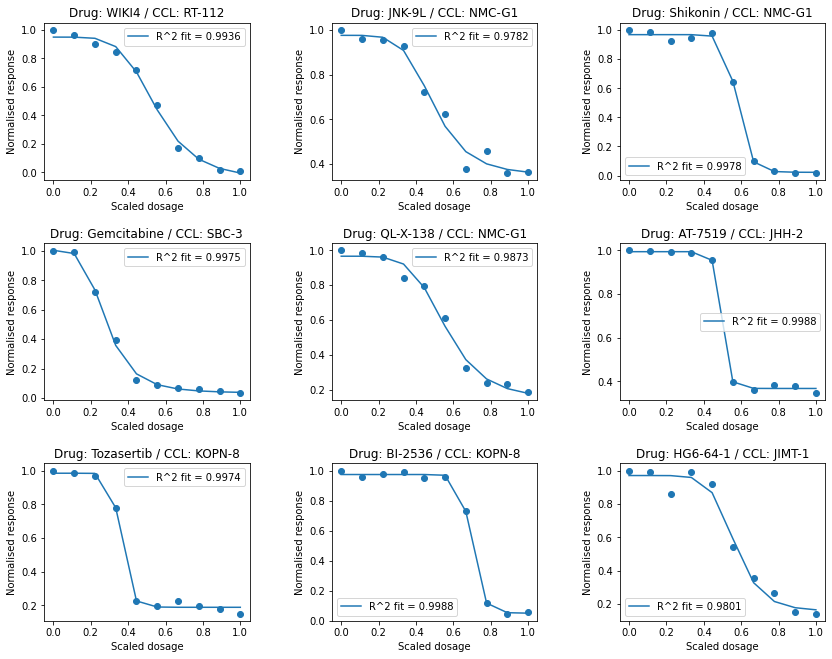

In [19]:
%%time
fitting_function = "ll4_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### ll4R_4_param

100%|██████████| 2724/2724 [00:04<00:00, 635.40it/s]


R2>0: (2710, 44)
R2>0.9 2690
CPU times: user 4.49 s, sys: 56.3 ms, total: 4.55 s
Wall time: 4.51 s


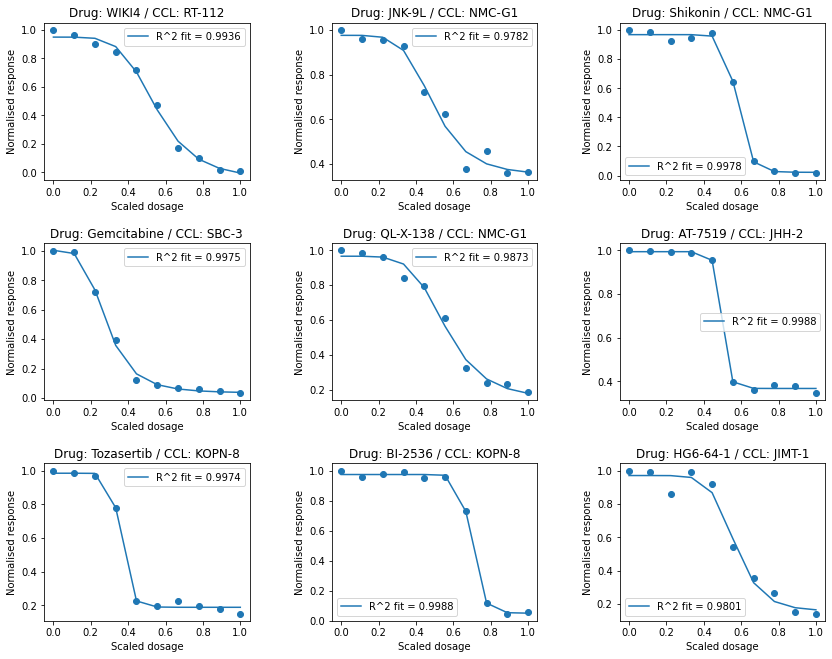

In [20]:
%%time
fitting_function = "ll4R_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logLogist_3_param

100%|██████████| 2710/2710 [00:04<00:00, 660.39it/s]


R2>0: (2710, 46)
R2>0.9 2682
CPU times: user 4.26 s, sys: 20.2 ms, total: 4.28 s
Wall time: 4.25 s


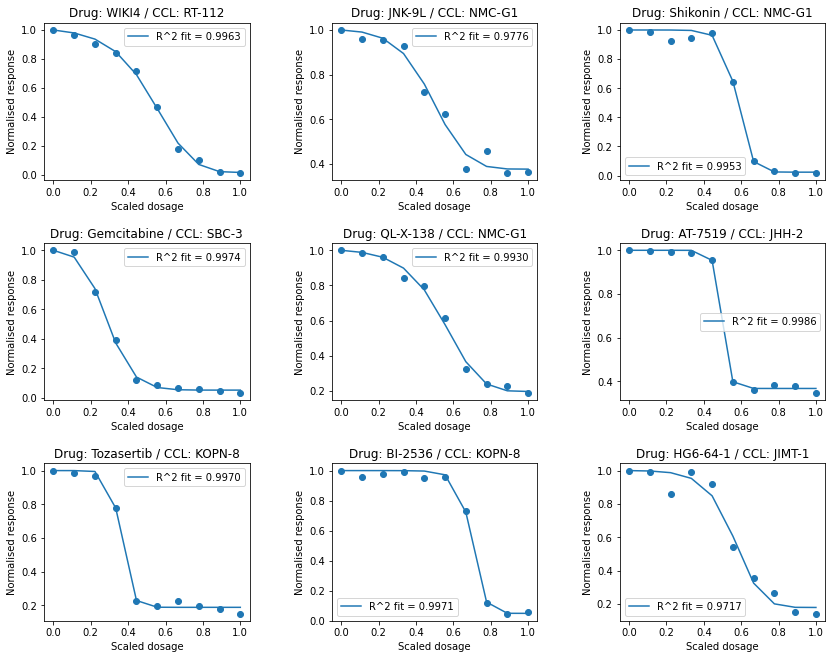

In [21]:
%%time
fitting_function = "logLogist_3_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

## Comparison of fitting models

In [22]:
functions = {"fsigmoid", 
             "sigmoid_2_param",
             "sigmoid_3_param",
             "sigmoid_4_param",
             "logistic_4_param",
            "ll4_4_param",
            "ll4R_4_param",
            "logLogist_3_param"}

functions_dict= dict(list(enumerate(functions)))
r2_columns = [fitting_function+"_r2" for fitting_function in functions]

In [23]:
df["better_fitting"] = np.argmax(df[r2_columns].values, axis=1)
r2_col_res = r2_columns +["better_fitting"]
df["better_fitting"] = df["better_fitting"].map(functions_dict)
df[r2_col_res].head()

,sigmoid_4_param_r2,logLogist_3_param_r2,sigmoid_3_param_r2,fsigmoid_r2,sigmoid_2_param_r2,ll4_4_param_r2,ll4R_4_param_r2,logistic_4_param_r2,better_fitting
0,0.996467,0.996330,0.996302,0.995452,0.995452,0.993608,0.993608,0.993608,sigmoid_4_param
1,0.978440,0.977584,0.942793,0.899079,0.899079,0.978230,0.978230,0.978230,sigmoid_4_param
2,0.997584,0.995329,0.995039,0.994659,0.994659,0.997801,0.997801,0.997801,logistic_4_param
3,0.997357,0.997399,0.997270,0.987070,0.987070,0.997515,0.997515,0.997515,ll4_4_param
4,0.991678,0.993016,0.979949,0.969244,0.969244,0.987341,0.987341,0.987341,logLogist_3_param


In [24]:
df["better_fitting"].value_counts()

sigmoid_4_param      1109
logLogist_3_param     778
logistic_4_param      295
ll4R_4_param          267
ll4_4_param           261
Name: better_fitting, dtype: int64

In [25]:
r2_limit = 0.98
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.98
sigmoid_4_param,2296
ll4_4_param,2278
ll4R_4_param,2278
logistic_4_param,2278
logLogist_3_param,2251
sigmoid_3_param,1829
fsigmoid,1397
sigmoid_2_param,1397


In [26]:
r2_limit = 0.95
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.95
ll4_4_param,2620
ll4R_4_param,2620
logistic_4_param,2620
logLogist_3_param,2593
sigmoid_4_param,2590
sigmoid_3_param,2442
fsigmoid,2038
sigmoid_2_param,2038


In [27]:
r2_limit = 0.9
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.9
ll4_4_param,2690
ll4R_4_param,2690
logistic_4_param,2690
logLogist_3_param,2682
sigmoid_4_param,2660
sigmoid_3_param,2654
fsigmoid,2430
sigmoid_2_param,2430


In [29]:
df.to_csv("results/fit_123.csv", index=False)